In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
import optuna

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

c:\Users\harie\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [4]:
train_data.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train_data['BMI'] = train_data['Weight'] / (train_data['Height']**2)

In [1]:
train_data.drop(['id'], axis=1, inplace=True)

NameError: name 'train_data' is not defined

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [10]:
train_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000
BMI,20758.000000,30.241842,8.333932,12.868541,24.088223,29.384757,37.011168,54.997991


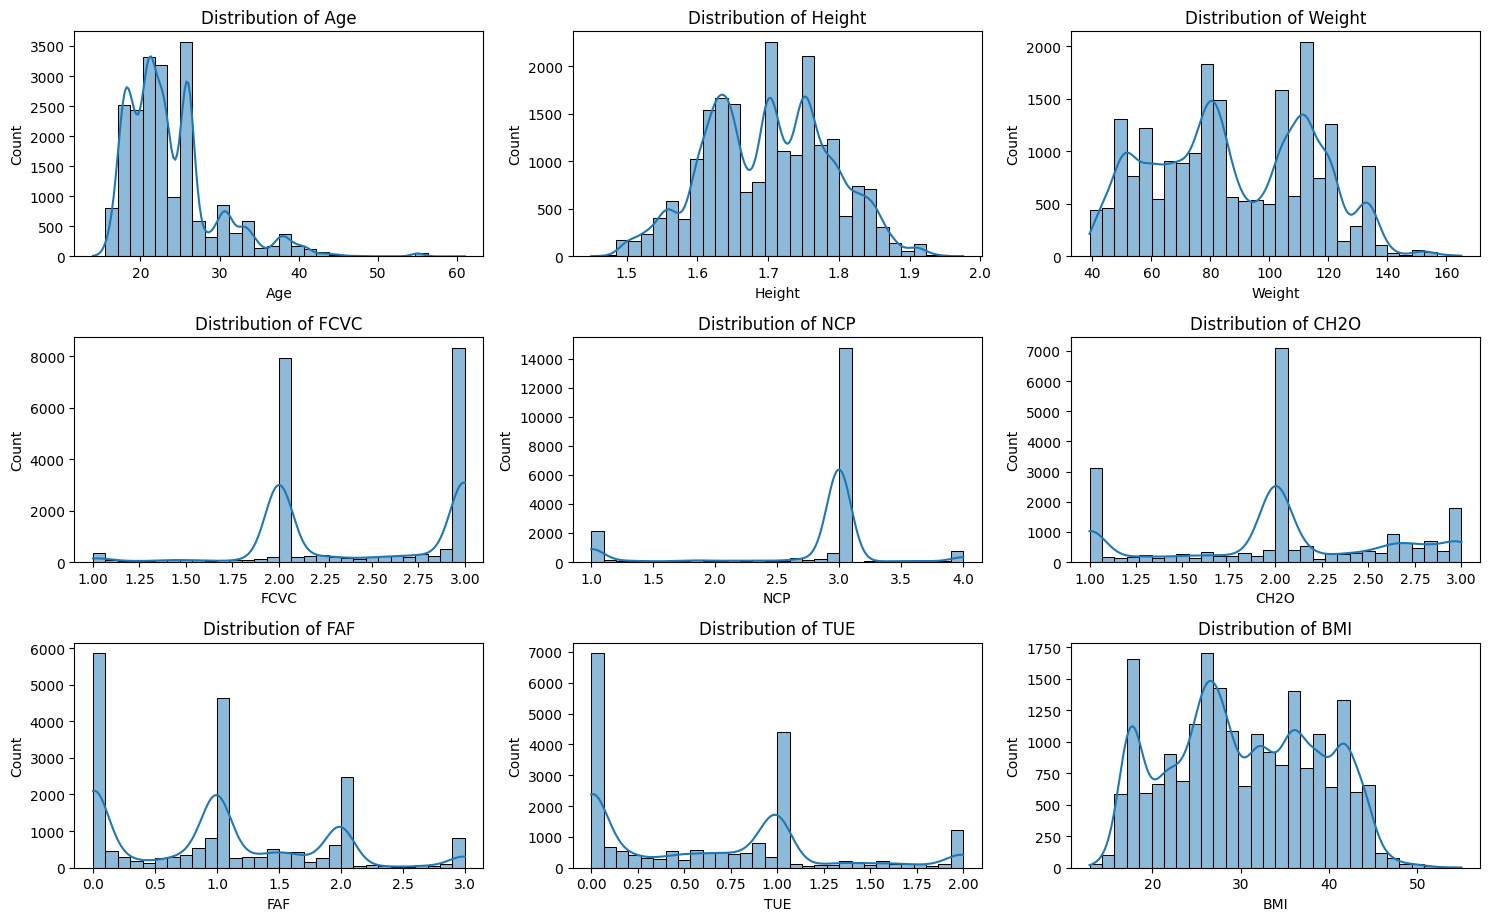

In [11]:
num_var = train_data.select_dtypes(include=['number']).columns

# Row of subplot
n_row = len(num_var) // 2 + len(num_var) % 2

plt.figure(figsize=(15, 3*n_row))
for i, column in enumerate(num_var, 1):
    plt.subplot(n_row,3,i)
    sns.histplot(train_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


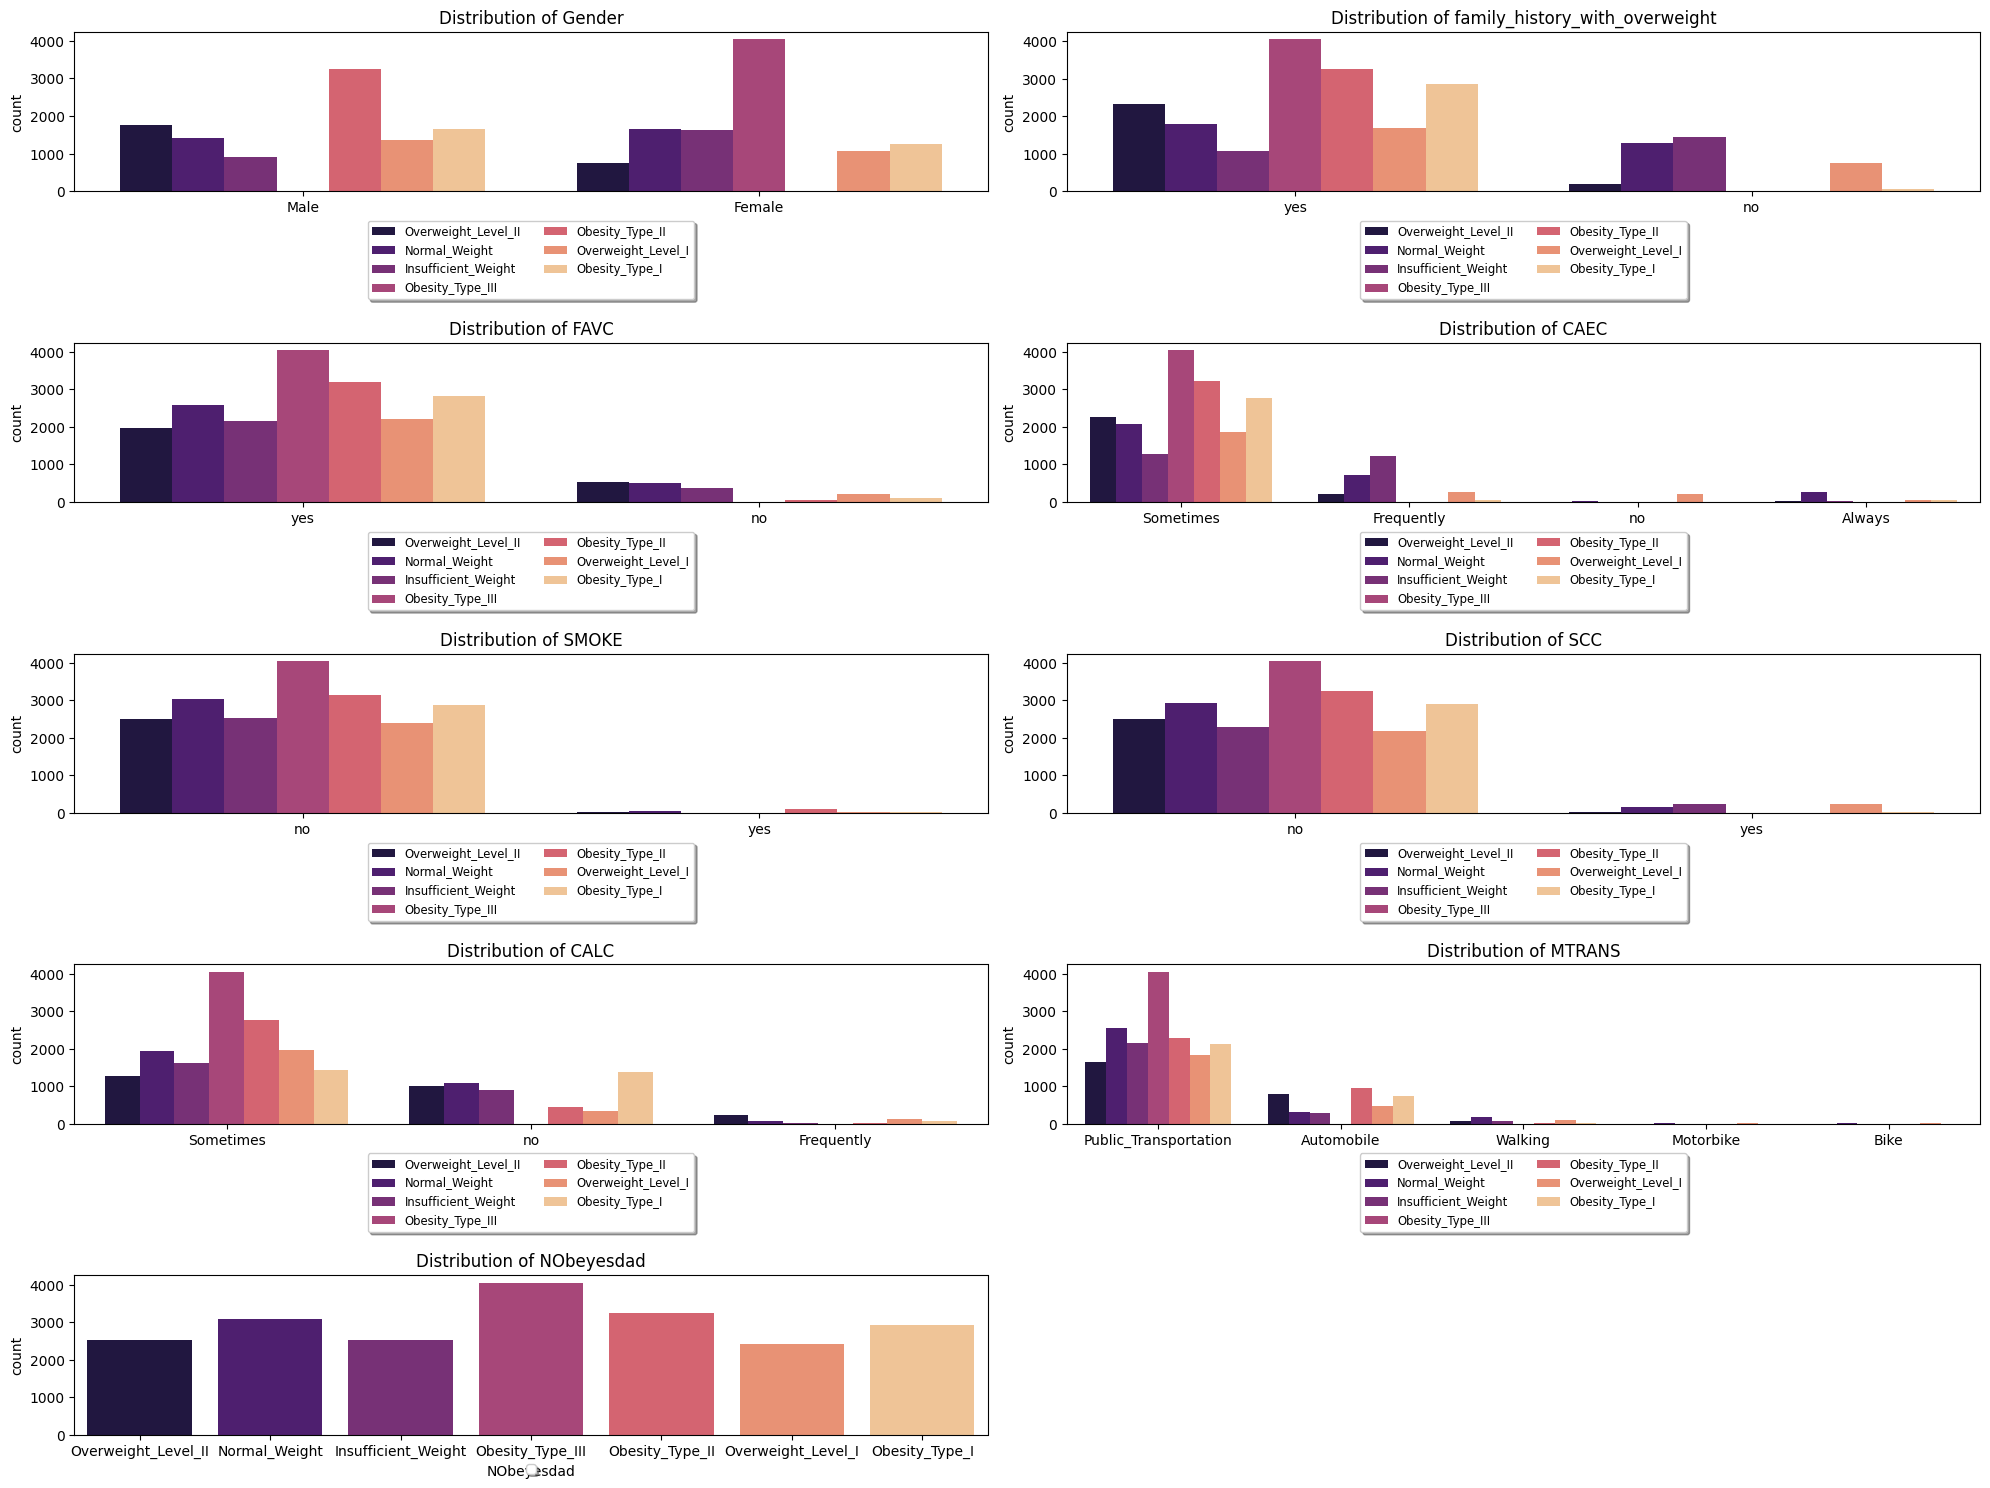

In [15]:
cat_var = train_data.select_dtypes(include=['object']).columns

# Row of subplot
n_row = len(cat_var) // 2 + len(cat_var) % 2

plt.figure(figsize=(20, 15))
for i, column in enumerate(cat_var, 1):
    plt.subplot(n_row, 2, i)
    sns.countplot(data=train_data,
                  x=column,
                  hue='NObeyesdad',
                  palette='magma')
    plt.title(f'Distribution of {column}')
    plt.legend(loc='upper center', 
               bbox_to_anchor=(0.5, -0.15), 
               shadow=True, 
               ncol=2, 
               fontsize='small')  # Set legend fontsize to small
plt.tight_layout()
plt.show()

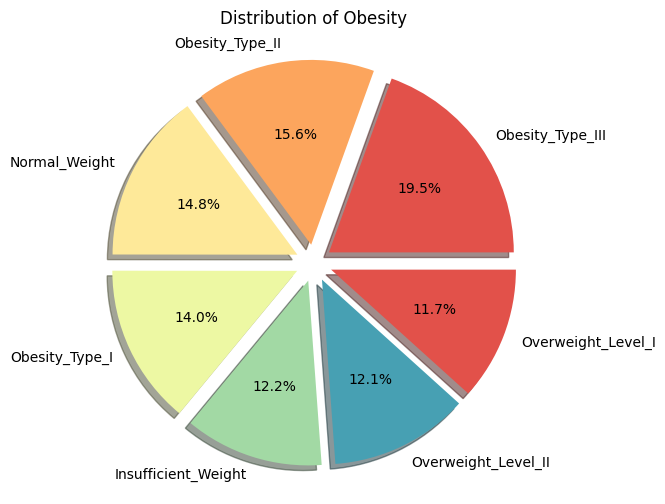

In [16]:
target_counts = train_data['NObeyesdad'].value_counts()

plt.figure(figsize=(10,6))
explode = (0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1) 
plt.pie(target_counts,
       labels = target_counts.index,
       autopct='%1.1f%%',
       explode=explode,
       shadow=True,
       colors=sns.color_palette('Spectral'))
plt.title('Distribution of Obesity')
plt.show()

In [17]:
train_data['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

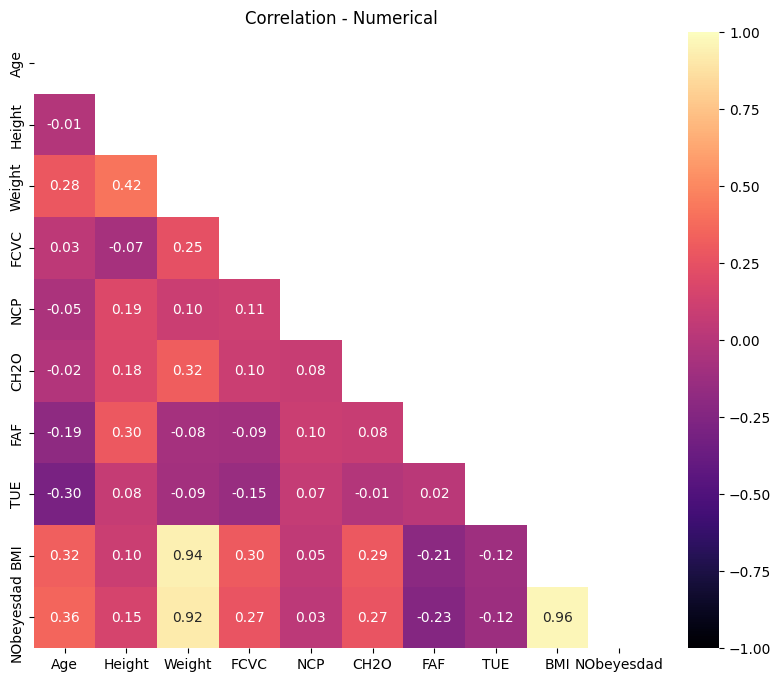

In [19]:
columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI','NObeyesdad']

mask = np.triu(np.ones_like(train_data[columns].corr(),dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(train_data[columns].corr(),
           mask=mask,
           vmax= 1,
           vmin= -1,
           cmap= 'magma',
           annot=True,
           square=True,
           fmt='.2f')
plt.title('Correlation - Numerical')
plt.show()

In [20]:
train_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,3,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,0,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,6,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,3,25.599151


In [21]:
cat_var

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [22]:
cat_var = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS']

# Apply LabelEncoder to each categorical variable
label_encoders = {}
for column in cat_var:
    label_encoders[column] = LabelEncoder()
    train_data[column + '_encoded'] = label_encoders[column].fit_transform(train_data[column])
    
# Concatenate encoded categorical variables with the original dataset
train_data = train_data.drop(cat_var, axis=1)
train_data[0:5]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,3,28.259565,1,1,1,2,0,0,1,3
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,23.422091,0,1,1,1,0,0,2,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,17.126706,0,1,1,2,0,0,2,3
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,6,44.855798,0,1,1,2,0,0,1,3
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,3,25.599151,1,1,1,2,0,0,1,3


In [23]:
seed = np.random.seed(6)

# Define Features
X = train_data.drop(['NObeyesdad'], axis=1)

# Define Target
y = train_data['NObeyesdad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed)

In [25]:
models = ({'GB': GradientBoostingClassifier(),
          'XGB': XGBClassifier(),
          'LGBM': LGBMClassifier()})

In [26]:
skf = KFold(n_splits=5, shuffle=True, random_state=seed)
model_list, accuracy_list = [],[]

def kfold_val(skf,models):
    for model_name, model in models.items():
        accuracy_temp = []
        for train_index, test_index in skf.split(X,y):
            
            X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
            y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_test_fold)
            
            accuracy = accuracy_score(y_test_fold, y_pred)
            accuracy_temp.append(accuracy)
            
        model_list.append(model_name)
        accuracy_list.append(np.average(accuracy_temp))
        
    return (pd.DataFrame({'Models': model_list,
                         'Accuracy': accuracy_list}))

In [27]:
kfold_result = kfold_val(skf,models)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 17
[LightGBM] [Info] Start training from score -2.103207
[LightGBM] [Info] Start training from score -1.910416
[LightGBM] [Info] Start training from score -2.150691
[LightGBM] [Info] Start training from score -2.116117
[LightGBM] [Info] Start training from score -1.966044
[LightGBM] [Info] Start training from score -1.852715
[LightGBM] [Info] Start training from score -1.628651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2302
[LightGBM

In [28]:
kfold_result.sort_values(by='Accuracy',ascending=False)

,Models,Accuracy
1,XGB,0.906060
2,LGBM,0.904519
0,GB,0.902062


In [29]:
def objective_lgbm(trial):
    
    lgbm_params = {
    'learning_rate': trial.suggest_float('learning_rate', 0.0, 0.2),
    'max_depth': trial.suggest_int('max_depth', 1, 30),
    'num_leaves': trial.suggest_int('num_leaves', 20, 100),
    'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 30),
    'boosting_type': trial.suggest_categorical('boosting_type',['gbdt', 'dart','rf']),
    'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
    'subsample': trial.suggest_float('subsample',0.1,1.0),
    'subsample_freq': trial.suggest_int('subsample_freq',1,20),
    'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
    'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
    'min_child_samples': trial.suggest_int('min_child_samples', 10, 30),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0)
    }
    
    lgbm = LGBMClassifier(**lgbm_params,verbose=-1,random_state=seed)
    lgbm.fit(X_train,y_train)
    
    
    score = (accuracy_score(y_test, lgbm.predict(X_test)))
    return score

study_lgbm = optuna.create_study(direction='maximize')

study_lgbm.optimize(objective_lgbm, n_trials=50, show_progress_bar=True)

[I 2024-03-11 22:50:35,916] A new study created in memory with name: no-name-ac2eec26-84d5-4a75-ba59-667df6584ba1
Best trial: 0. Best value: 0.878613:   2%|▏         | 1/50 [00:05<04:17,  5.25s/it]

[I 2024-03-11 22:50:41,172] Trial 0 finished with value: 0.8786127167630058 and parameters: {'learning_rate': 0.1400156302067384, 'max_depth': 28, 'num_leaves': 32, 'min_data_in_leaf': 13, 'boosting_type': 'rf', 'n_estimators': 643, 'subsample': 0.6235357929253456, 'subsample_freq': 20, 'reg_alpha': 4.101924975454453, 'reg_lambda': 8.616564645238913, 'min_child_samples': 22, 'colsample_bytree': 0.4494962524701406}. Best is trial 0 with value: 0.8786127167630058.


Best trial: 0. Best value: 0.878613:   4%|▍         | 2/50 [00:05<01:59,  2.48s/it]

[I 2024-03-11 22:50:41,709] Trial 1 finished with value: 0.7947976878612717 and parameters: {'learning_rate': 0.14587542907650605, 'max_depth': 22, 'num_leaves': 80, 'min_data_in_leaf': 14, 'boosting_type': 'rf', 'n_estimators': 147, 'subsample': 0.17254893477276917, 'subsample_freq': 17, 'reg_alpha': 2.3936079645132624, 'reg_lambda': 6.60616222178933, 'min_child_samples': 10, 'colsample_bytree': 0.10702768875549362}. Best is trial 0 with value: 0.8786127167630058.


Best trial: 2. Best value: 0.906551:   6%|▌         | 3/50 [00:08<01:59,  2.54s/it]

[I 2024-03-11 22:50:44,326] Trial 2 finished with value: 0.9065510597302505 and parameters: {'learning_rate': 0.11433401156532222, 'max_depth': 7, 'num_leaves': 72, 'min_data_in_leaf': 19, 'boosting_type': 'gbdt', 'n_estimators': 696, 'subsample': 0.1463957802773998, 'subsample_freq': 15, 'reg_alpha': 3.1581531956144016, 'reg_lambda': 2.8031465897513552, 'min_child_samples': 28, 'colsample_bytree': 0.40225467555085204}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:   8%|▊         | 4/50 [00:43<11:39, 15.20s/it]

[I 2024-03-11 22:51:18,926] Trial 3 finished with value: 0.8994861913937059 and parameters: {'learning_rate': 0.023284061767667952, 'max_depth': 15, 'num_leaves': 52, 'min_data_in_leaf': 27, 'boosting_type': 'dart', 'n_estimators': 592, 'subsample': 0.3671827303052386, 'subsample_freq': 20, 'reg_alpha': 2.954370662523438, 'reg_lambda': 5.900376802003819, 'min_child_samples': 17, 'colsample_bytree': 0.5615658962471177}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  10%|█         | 5/50 [00:44<07:46, 10.36s/it]

[I 2024-03-11 22:51:20,699] Trial 4 finished with value: 0.8057161207450225 and parameters: {'learning_rate': 0.05724463475296629, 'max_depth': 5, 'num_leaves': 34, 'min_data_in_leaf': 15, 'boosting_type': 'rf', 'n_estimators': 298, 'subsample': 0.5282411137833819, 'subsample_freq': 17, 'reg_alpha': 8.026986736800216, 'reg_lambda': 6.202261114293587, 'min_child_samples': 14, 'colsample_bytree': 0.13012090415711908}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  12%|█▏        | 6/50 [00:45<05:06,  6.97s/it]

[I 2024-03-11 22:51:21,092] Trial 5 finished with value: 0.7886962106615286 and parameters: {'learning_rate': 0.15554803630900013, 'max_depth': 30, 'num_leaves': 68, 'min_data_in_leaf': 27, 'boosting_type': 'rf', 'n_estimators': 103, 'subsample': 0.10684585953862107, 'subsample_freq': 4, 'reg_alpha': 6.389229065824006, 'reg_lambda': 2.7956157810227156, 'min_child_samples': 16, 'colsample_bytree': 0.007960061090412918}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  14%|█▍        | 7/50 [00:53<05:12,  7.26s/it]

[I 2024-03-11 22:51:28,948] Trial 6 finished with value: 0.8978805394990366 and parameters: {'learning_rate': 0.12004297279898474, 'max_depth': 26, 'num_leaves': 65, 'min_data_in_leaf': 30, 'boosting_type': 'gbdt', 'n_estimators': 647, 'subsample': 0.14208392995624664, 'subsample_freq': 6, 'reg_alpha': 0.4379169420193607, 'reg_lambda': 2.4334736409625544, 'min_child_samples': 27, 'colsample_bytree': 0.6019150459399754}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  16%|█▌        | 8/50 [00:56<04:13,  6.05s/it]

[I 2024-03-11 22:51:32,401] Trial 7 finished with value: 0.8770070648683366 and parameters: {'learning_rate': 0.12726442181972264, 'max_depth': 30, 'num_leaves': 96, 'min_data_in_leaf': 25, 'boosting_type': 'rf', 'n_estimators': 154, 'subsample': 0.9771948331100055, 'subsample_freq': 18, 'reg_alpha': 8.019129101627517, 'reg_lambda': 5.496784292339011, 'min_child_samples': 19, 'colsample_bytree': 0.5510855525170563}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  18%|█▊        | 9/50 [00:58<03:15,  4.77s/it]

[I 2024-03-11 22:51:34,367] Trial 8 finished with value: 0.905587668593449 and parameters: {'learning_rate': 0.11156512763651166, 'max_depth': 26, 'num_leaves': 51, 'min_data_in_leaf': 24, 'boosting_type': 'gbdt', 'n_estimators': 124, 'subsample': 0.4969418402832869, 'subsample_freq': 15, 'reg_alpha': 4.154748800654678, 'reg_lambda': 4.0535742603335025, 'min_child_samples': 30, 'colsample_bytree': 0.4755510707472601}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  20%|██        | 10/50 [01:03<03:14,  4.85s/it]

[I 2024-03-11 22:51:39,396] Trial 9 finished with value: 0.8763648041104688 and parameters: {'learning_rate': 0.13307334268792279, 'max_depth': 8, 'num_leaves': 29, 'min_data_in_leaf': 14, 'boosting_type': 'rf', 'n_estimators': 439, 'subsample': 0.8119559426930821, 'subsample_freq': 9, 'reg_alpha': 5.84929087735638, 'reg_lambda': 7.677880758943964, 'min_child_samples': 15, 'colsample_bytree': 0.5191760775720156}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  22%|██▏       | 11/50 [01:06<02:43,  4.19s/it]

[I 2024-03-11 22:51:42,088] Trial 10 finished with value: 0.8933847141939627 and parameters: {'learning_rate': 0.19798705869521127, 'max_depth': 1, 'num_leaves': 95, 'min_data_in_leaf': 19, 'boosting_type': 'gbdt', 'n_estimators': 933, 'subsample': 0.2886255074583379, 'subsample_freq': 13, 'reg_alpha': 9.844845371452722, 'reg_lambda': 0.1447508366600041, 'min_child_samples': 24, 'colsample_bytree': 0.8353490379403061}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  24%|██▍       | 12/50 [01:14<03:27,  5.45s/it]

[I 2024-03-11 22:51:50,430] Trial 11 finished with value: 0.905587668593449 and parameters: {'learning_rate': 0.07714509735770964, 'max_depth': 15, 'num_leaves': 50, 'min_data_in_leaf': 21, 'boosting_type': 'gbdt', 'n_estimators': 856, 'subsample': 0.492331519451541, 'subsample_freq': 12, 'reg_alpha': 1.8144703088221519, 'reg_lambda': 3.762165167960319, 'min_child_samples': 30, 'colsample_bytree': 0.3205389382737531}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  26%|██▌       | 13/50 [01:22<03:50,  6.24s/it]

[I 2024-03-11 22:51:58,494] Trial 12 finished with value: 0.9043031470777135 and parameters: {'learning_rate': 0.09091972313353643, 'max_depth': 20, 'num_leaves': 78, 'min_data_in_leaf': 20, 'boosting_type': 'gbdt', 'n_estimators': 800, 'subsample': 0.6944449323401601, 'subsample_freq': 14, 'reg_alpha': 4.354500087325999, 'reg_lambda': 1.1625087032204564, 'min_child_samples': 30, 'colsample_bytree': 0.7649552753819661}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 2. Best value: 0.906551:  28%|██▊       | 14/50 [01:26<03:24,  5.67s/it]

[I 2024-03-11 22:52:02,830] Trial 13 finished with value: 0.903339755940912 and parameters: {'learning_rate': 0.18208737665610086, 'max_depth': 10, 'num_leaves': 47, 'min_data_in_leaf': 23, 'boosting_type': 'gbdt', 'n_estimators': 376, 'subsample': 0.37019416711906505, 'subsample_freq': 9, 'reg_alpha': 0.25837857034387124, 'reg_lambda': 4.061302917706143, 'min_child_samples': 26, 'colsample_bytree': 0.31769024391310285}. Best is trial 2 with value: 0.9065510597302505.


Best trial: 14. Best value: 0.906872:  30%|███       | 15/50 [02:30<13:30, 23.15s/it]

[I 2024-03-11 22:53:06,509] Trial 14 finished with value: 0.9068721901091843 and parameters: {'learning_rate': 0.04729525114465004, 'max_depth': 20, 'num_leaves': 80, 'min_data_in_leaf': 18, 'boosting_type': 'dart', 'n_estimators': 748, 'subsample': 0.279731273037892, 'subsample_freq': 15, 'reg_alpha': 3.4103942932502584, 'reg_lambda': 4.23427403637175, 'min_child_samples': 27, 'colsample_bytree': 0.9920987703011793}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 14. Best value: 0.906872:  32%|███▏      | 16/50 [03:19<17:35, 31.04s/it]

[I 2024-03-11 22:53:55,870] Trial 15 finished with value: 0.8725112395632627 and parameters: {'learning_rate': 0.0015513513558856884, 'max_depth': 11, 'num_leaves': 82, 'min_data_in_leaf': 10, 'boosting_type': 'dart', 'n_estimators': 731, 'subsample': 0.25405866496320423, 'subsample_freq': 11, 'reg_alpha': 3.0530209554883885, 'reg_lambda': 1.8631273271929283, 'min_child_samples': 26, 'colsample_bytree': 0.9654041565165056}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 14. Best value: 0.906872:  34%|███▍      | 17/50 [04:57<27:59, 50.91s/it]

[I 2024-03-11 22:55:32,964] Trial 16 finished with value: 0.9065510597302505 and parameters: {'learning_rate': 0.05942189260510418, 'max_depth': 19, 'num_leaves': 72, 'min_data_in_leaf': 17, 'boosting_type': 'dart', 'n_estimators': 997, 'subsample': 0.2607210329437831, 'subsample_freq': 15, 'reg_alpha': 1.718576017042468, 'reg_lambda': 9.759796393246162, 'min_child_samples': 22, 'colsample_bytree': 0.7394240994730001}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 14. Best value: 0.906872:  36%|███▌      | 18/50 [05:05<20:22, 38.19s/it]

[I 2024-03-11 22:55:41,562] Trial 17 finished with value: 0.873795761078998 and parameters: {'learning_rate': 0.03823985430992084, 'max_depth': 1, 'num_leaves': 90, 'min_data_in_leaf': 17, 'boosting_type': 'dart', 'n_estimators': 527, 'subsample': 0.38457207055241543, 'subsample_freq': 1, 'reg_alpha': 5.713068938618222, 'reg_lambda': 4.666617047533073, 'min_child_samples': 28, 'colsample_bytree': 0.3166732983433197}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 14. Best value: 0.906872:  38%|███▊      | 19/50 [06:05<23:06, 44.72s/it]

[I 2024-03-11 22:56:41,467] Trial 18 finished with value: 0.9039820166987798 and parameters: {'learning_rate': 0.08609428232206266, 'max_depth': 13, 'num_leaves': 61, 'min_data_in_leaf': 18, 'boosting_type': 'dart', 'n_estimators': 744, 'subsample': 0.21511516645035872, 'subsample_freq': 8, 'reg_alpha': 3.2300328506573055, 'reg_lambda': 3.353249241156746, 'min_child_samples': 24, 'colsample_bytree': 0.9089105669376054}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 14. Best value: 0.906872:  40%|████      | 20/50 [07:37<29:27, 58.92s/it]

[I 2024-03-11 22:58:13,487] Trial 19 finished with value: 0.905587668593449 and parameters: {'learning_rate': 0.06095922507165141, 'max_depth': 7, 'num_leaves': 88, 'min_data_in_leaf': 22, 'boosting_type': 'dart', 'n_estimators': 876, 'subsample': 0.40387342378468233, 'subsample_freq': 16, 'reg_alpha': 1.2173378176537364, 'reg_lambda': 0.681837086227203, 'min_child_samples': 24, 'colsample_bytree': 0.6726517448218794}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 14. Best value: 0.906872:  42%|████▏     | 21/50 [08:30<27:34, 57.06s/it]

[I 2024-03-11 22:59:06,222] Trial 20 finished with value: 0.8982016698779705 and parameters: {'learning_rate': 0.02315037930499006, 'max_depth': 18, 'num_leaves': 74, 'min_data_in_leaf': 12, 'boosting_type': 'dart', 'n_estimators': 711, 'subsample': 0.3071689702814643, 'subsample_freq': 13, 'reg_alpha': 5.189327898147923, 'reg_lambda': 1.654827112694183, 'min_child_samples': 20, 'colsample_bytree': 0.37753636843403326}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 14. Best value: 0.906872:  44%|████▍     | 22/50 [09:47<29:30, 63.22s/it]

[I 2024-03-11 23:00:23,802] Trial 21 finished with value: 0.9059087989723827 and parameters: {'learning_rate': 0.062487665428915554, 'max_depth': 22, 'num_leaves': 71, 'min_data_in_leaf': 16, 'boosting_type': 'dart', 'n_estimators': 854, 'subsample': 0.22320147025016723, 'subsample_freq': 15, 'reg_alpha': 1.5107300641651877, 'reg_lambda': 9.10960383579296, 'min_child_samples': 22, 'colsample_bytree': 0.7419432645523141}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 14. Best value: 0.906872:  46%|████▌     | 23/50 [11:05<30:22, 67.51s/it]

[I 2024-03-11 23:01:41,332] Trial 22 finished with value: 0.9014129736673089 and parameters: {'learning_rate': 0.0472320487909514, 'max_depth': 19, 'num_leaves': 85, 'min_data_in_leaf': 18, 'boosting_type': 'dart', 'n_estimators': 970, 'subsample': 0.13900096869787842, 'subsample_freq': 18, 'reg_alpha': 2.148390548005552, 'reg_lambda': 9.665446289454659, 'min_child_samples': 28, 'colsample_bytree': 0.9805583984577345}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 14. Best value: 0.906872:  48%|████▊     | 24/50 [12:41<32:56, 76.01s/it]

[I 2024-03-11 23:03:17,152] Trial 23 finished with value: 0.9036608863198459 and parameters: {'learning_rate': 0.10766766695370455, 'max_depth': 17, 'num_leaves': 59, 'min_data_in_leaf': 16, 'boosting_type': 'dart', 'n_estimators': 990, 'subsample': 0.3080675604874812, 'subsample_freq': 11, 'reg_alpha': 3.6481187394952923, 'reg_lambda': 7.050947368422124, 'min_child_samples': 22, 'colsample_bytree': 0.8688637260021272}. Best is trial 14 with value: 0.9068721901091843.


Best trial: 24. Best value: 0.907836:  50%|█████     | 25/50 [13:18<26:50, 64.40s/it]

[I 2024-03-11 23:03:54,483] Trial 24 finished with value: 0.9078355812459858 and parameters: {'learning_rate': 0.07337892949557773, 'max_depth': 23, 'num_leaves': 20, 'min_data_in_leaf': 21, 'boosting_type': 'dart', 'n_estimators': 564, 'subsample': 0.4442303033824492, 'subsample_freq': 14, 'reg_alpha': 0.6975460605650543, 'reg_lambda': 4.703835297022026, 'min_child_samples': 26, 'colsample_bytree': 0.6590051698734962}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  52%|█████▏    | 26/50 [13:23<18:37, 46.58s/it]

[I 2024-03-11 23:03:59,476] Trial 25 finished with value: 0.9068721901091843 and parameters: {'learning_rate': 0.07891700512461602, 'max_depth': 23, 'num_leaves': 21, 'min_data_in_leaf': 20, 'boosting_type': 'gbdt', 'n_estimators': 515, 'subsample': 0.46201512586266996, 'subsample_freq': 13, 'reg_alpha': 0.8346978196085995, 'reg_lambda': 4.8111988936937236, 'min_child_samples': 28, 'colsample_bytree': 0.2080927736644476}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  54%|█████▍    | 27/50 [13:52<15:47, 41.19s/it]

[I 2024-03-11 23:04:28,096] Trial 26 finished with value: 0.9068721901091843 and parameters: {'learning_rate': 0.07586278208996132, 'max_depth': 24, 'num_leaves': 21, 'min_data_in_leaf': 21, 'boosting_type': 'dart', 'n_estimators': 497, 'subsample': 0.6051446514343795, 'subsample_freq': 12, 'reg_alpha': 0.39729773564332127, 'reg_lambda': 4.88062107379912, 'min_child_samples': 25, 'colsample_bytree': 0.1629268199318602}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  56%|█████▌    | 28/50 [13:55<10:53, 29.68s/it]

[I 2024-03-11 23:04:30,932] Trial 27 finished with value: 0.9026974951830443 and parameters: {'learning_rate': 0.03195218292602156, 'max_depth': 22, 'num_leaves': 21, 'min_data_in_leaf': 25, 'boosting_type': 'gbdt', 'n_estimators': 304, 'subsample': 0.4407363681187013, 'subsample_freq': 13, 'reg_alpha': 1.2230399982654774, 'reg_lambda': 5.393275797622481, 'min_child_samples': 28, 'colsample_bytree': 0.24025766948623717}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  58%|█████▊    | 29/50 [14:45<12:37, 36.06s/it]

[I 2024-03-11 23:05:21,883] Trial 28 finished with value: 0.9068721901091843 and parameters: {'learning_rate': 0.09726388286750756, 'max_depth': 25, 'num_leaves': 39, 'min_data_in_leaf': 22, 'boosting_type': 'dart', 'n_estimators': 567, 'subsample': 0.6151539748790341, 'subsample_freq': 10, 'reg_alpha': 0.9335560328184799, 'reg_lambda': 4.767283099456259, 'min_child_samples': 26, 'colsample_bytree': 0.6449401165839572}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  60%|██████    | 30/50 [14:54<09:16, 27.82s/it]

[I 2024-03-11 23:05:30,480] Trial 29 finished with value: 0.8994861913937059 and parameters: {'learning_rate': 0.005420003302294973, 'max_depth': 27, 'num_leaves': 26, 'min_data_in_leaf': 20, 'boosting_type': 'gbdt', 'n_estimators': 635, 'subsample': 0.7533197164817242, 'subsample_freq': 20, 'reg_alpha': 2.410220727828701, 'reg_lambda': 7.4119062817301735, 'min_child_samples': 20, 'colsample_bytree': 0.8042632430877815}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  62%|██████▏   | 31/50 [15:11<07:47, 24.59s/it]

[I 2024-03-11 23:05:47,538] Trial 30 finished with value: 0.8917790622992935 and parameters: {'learning_rate': 0.07588688488930904, 'max_depth': 23, 'num_leaves': 41, 'min_data_in_leaf': 23, 'boosting_type': 'dart', 'n_estimators': 454, 'subsample': 0.42937925116533127, 'subsample_freq': 7, 'reg_alpha': 0.1144485653131797, 'reg_lambda': 4.450332529620824, 'min_child_samples': 29, 'colsample_bytree': 0.012071962761046051}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  64%|██████▍   | 32/50 [15:42<07:58, 26.59s/it]

[I 2024-03-11 23:06:18,779] Trial 31 finished with value: 0.9062299293513166 and parameters: {'learning_rate': 0.07439989915625904, 'max_depth': 24, 'num_leaves': 20, 'min_data_in_leaf': 20, 'boosting_type': 'dart', 'n_estimators': 491, 'subsample': 0.5913770717771494, 'subsample_freq': 12, 'reg_alpha': 0.6996739153735054, 'reg_lambda': 5.143908225469355, 'min_child_samples': 25, 'colsample_bytree': 0.22868915849906715}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  66%|██████▌   | 33/50 [16:02<06:57, 24.57s/it]

[I 2024-03-11 23:06:38,636] Trial 32 finished with value: 0.8937058445728966 and parameters: {'learning_rate': 0.044066255375973376, 'max_depth': 21, 'num_leaves': 24, 'min_data_in_leaf': 21, 'boosting_type': 'dart', 'n_estimators': 388, 'subsample': 0.5570366976806429, 'subsample_freq': 14, 'reg_alpha': 0.7383756418936852, 'reg_lambda': 3.2521815424939247, 'min_child_samples': 25, 'colsample_bytree': 0.14545476447603817}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  68%|██████▊   | 34/50 [16:55<08:48, 33.01s/it]

[I 2024-03-11 23:07:31,350] Trial 33 finished with value: 0.9036608863198459 and parameters: {'learning_rate': 0.08692713072147176, 'max_depth': 28, 'num_leaves': 34, 'min_data_in_leaf': 18, 'boosting_type': 'dart', 'n_estimators': 542, 'subsample': 0.6397934305196925, 'subsample_freq': 17, 'reg_alpha': 2.430683022102987, 'reg_lambda': 6.484685441642105, 'min_child_samples': 27, 'colsample_bytree': 0.23100145969830974}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  70%|███████   | 35/50 [17:41<09:11, 36.80s/it]

[I 2024-03-11 23:08:16,975] Trial 34 finished with value: 0.9004495825305073 and parameters: {'learning_rate': 0.07256627655066238, 'max_depth': 24, 'num_leaves': 29, 'min_data_in_leaf': 21, 'boosting_type': 'dart', 'n_estimators': 610, 'subsample': 0.6764684169313583, 'subsample_freq': 12, 'reg_alpha': 0.24178004595914301, 'reg_lambda': 5.651794408089165, 'min_child_samples': 23, 'colsample_bytree': 0.08506625146616001}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  72%|███████▏  | 36/50 [18:42<10:17, 44.12s/it]

[I 2024-03-11 23:09:18,184] Trial 35 finished with value: 0.9068721901091843 and parameters: {'learning_rate': 0.1011723448613846, 'max_depth': 21, 'num_leaves': 38, 'min_data_in_leaf': 19, 'boosting_type': 'dart', 'n_estimators': 658, 'subsample': 0.46891323257641826, 'subsample_freq': 10, 'reg_alpha': 2.0555805975278787, 'reg_lambda': 3.5148210642521858, 'min_child_samples': 11, 'colsample_bytree': 0.4320527136951826}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  74%|███████▍  | 37/50 [18:43<06:47, 31.36s/it]

[I 2024-03-11 23:09:19,778] Trial 36 finished with value: 0.8285163776493256 and parameters: {'learning_rate': 0.05027220957719902, 'max_depth': 17, 'num_leaves': 26, 'min_data_in_leaf': 22, 'boosting_type': 'rf', 'n_estimators': 280, 'subsample': 0.5515643759485936, 'subsample_freq': 16, 'reg_alpha': 2.677249653759983, 'reg_lambda': 6.063830245967079, 'min_child_samples': 29, 'colsample_bytree': 0.07189217510277846}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  76%|███████▌  | 38/50 [18:47<04:37, 23.12s/it]

[I 2024-03-11 23:09:23,680] Trial 37 finished with value: 0.9026974951830443 and parameters: {'learning_rate': 0.02262051133506504, 'max_depth': 23, 'num_leaves': 31, 'min_data_in_leaf': 26, 'boosting_type': 'gbdt', 'n_estimators': 491, 'subsample': 0.3418825608929714, 'subsample_freq': 14, 'reg_alpha': 1.2189425527852715, 'reg_lambda': 8.18762023657315, 'min_child_samples': 27, 'colsample_bytree': 0.1702478636178842}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  78%|███████▊  | 39/50 [19:49<06:20, 34.58s/it]

[I 2024-03-11 23:10:24,999] Trial 38 finished with value: 0.905587668593449 and parameters: {'learning_rate': 0.07087199450762625, 'max_depth': 28, 'num_leaves': 43, 'min_data_in_leaf': 15, 'boosting_type': 'dart', 'n_estimators': 775, 'subsample': 0.807404108021244, 'subsample_freq': 18, 'reg_alpha': 4.605280784742256, 'reg_lambda': 2.5893378622836454, 'min_child_samples': 25, 'colsample_bytree': 0.36819379890185755}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 24. Best value: 0.907836:  80%|████████  | 40/50 [19:52<04:11, 25.13s/it]

[I 2024-03-11 23:10:28,045] Trial 39 finished with value: 0.8734746307000643 and parameters: {'learning_rate': 0.15663710959563243, 'max_depth': 25, 'num_leaves': 20, 'min_data_in_leaf': 29, 'boosting_type': 'rf', 'n_estimators': 392, 'subsample': 0.5181075817344967, 'subsample_freq': 16, 'reg_alpha': 7.072408501056958, 'reg_lambda': 4.412503850540403, 'min_child_samples': 29, 'colsample_bytree': 0.18380460898589907}. Best is trial 24 with value: 0.9078355812459858.


Best trial: 40. Best value: 0.908157:  82%|████████▏ | 41/50 [19:58<02:56, 19.63s/it]

[I 2024-03-11 23:10:34,847] Trial 40 finished with value: 0.9081567116249197 and parameters: {'learning_rate': 0.035329310054618826, 'max_depth': 20, 'num_leaves': 57, 'min_data_in_leaf': 24, 'boosting_type': 'gbdt', 'n_estimators': 671, 'subsample': 0.44515040625152485, 'subsample_freq': 19, 'reg_alpha': 3.613522613071827, 'reg_lambda': 5.049782125040005, 'min_child_samples': 23, 'colsample_bytree': 0.6727907179876648}. Best is trial 40 with value: 0.9081567116249197.


Best trial: 40. Best value: 0.908157:  84%|████████▍ | 42/50 [20:04<02:02, 15.34s/it]

[I 2024-03-11 23:10:40,180] Trial 41 finished with value: 0.905587668593449 and parameters: {'learning_rate': 0.05389700067249928, 'max_depth': 20, 'num_leaves': 56, 'min_data_in_leaf': 24, 'boosting_type': 'gbdt', 'n_estimators': 587, 'subsample': 0.42998176067168, 'subsample_freq': 19, 'reg_alpha': 3.4026788464731, 'reg_lambda': 4.84698621130415, 'min_child_samples': 21, 'colsample_bytree': 0.6101173234230602}. Best is trial 40 with value: 0.9081567116249197.


Best trial: 40. Best value: 0.908157:  86%|████████▌ | 43/50 [20:10<01:29, 12.74s/it]

[I 2024-03-11 23:10:46,850] Trial 42 finished with value: 0.9075144508670521 and parameters: {'learning_rate': 0.03327186709254143, 'max_depth': 16, 'num_leaves': 36, 'min_data_in_leaf': 23, 'boosting_type': 'gbdt', 'n_estimators': 670, 'subsample': 0.46232809317042767, 'subsample_freq': 19, 'reg_alpha': 3.636449821368345, 'reg_lambda': 5.204184359633056, 'min_child_samples': 26, 'colsample_bytree': 0.6926620934843128}. Best is trial 40 with value: 0.9081567116249197.


Best trial: 40. Best value: 0.908157:  88%|████████▊ | 44/50 [20:17<01:04, 10.75s/it]

[I 2024-03-11 23:10:52,973] Trial 43 finished with value: 0.9068721901091843 and parameters: {'learning_rate': 0.016290119342966133, 'max_depth': 13, 'num_leaves': 65, 'min_data_in_leaf': 28, 'boosting_type': 'gbdt', 'n_estimators': 670, 'subsample': 0.34602300791723867, 'subsample_freq': 19, 'reg_alpha': 3.8983244840015594, 'reg_lambda': 5.991885359175605, 'min_child_samples': 27, 'colsample_bytree': 0.6790359676953823}. Best is trial 40 with value: 0.9081567116249197.


Best trial: 44. Best value: 0.908478:  90%|█████████ | 45/50 [20:24<00:48,  9.72s/it]

[I 2024-03-11 23:11:00,290] Trial 44 finished with value: 0.9084778420038536 and parameters: {'learning_rate': 0.03408365979241531, 'max_depth': 17, 'num_leaves': 37, 'min_data_in_leaf': 25, 'boosting_type': 'gbdt', 'n_estimators': 789, 'subsample': 0.47012621827354384, 'subsample_freq': 19, 'reg_alpha': 4.991889143519884, 'reg_lambda': 3.971640892677633, 'min_child_samples': 18, 'colsample_bytree': 0.5394726664744105}. Best is trial 44 with value: 0.9084778420038536.


Best trial: 45. Best value: 0.909441:  92%|█████████▏| 46/50 [20:34<00:38,  9.71s/it]

[I 2024-03-11 23:11:09,966] Trial 45 finished with value: 0.9094412331406551 and parameters: {'learning_rate': 0.03092924220498919, 'max_depth': 15, 'num_leaves': 46, 'min_data_in_leaf': 26, 'boosting_type': 'gbdt', 'n_estimators': 809, 'subsample': 0.9926386100540587, 'subsample_freq': 19, 'reg_alpha': 5.319171582099372, 'reg_lambda': 3.944857701104717, 'min_child_samples': 19, 'colsample_bytree': 0.5188134107620008}. Best is trial 45 with value: 0.9094412331406551.


Best trial: 45. Best value: 0.909441:  94%|█████████▍| 47/50 [20:45<00:30, 10.09s/it]

[I 2024-03-11 23:11:20,940] Trial 46 finished with value: 0.9084778420038536 and parameters: {'learning_rate': 0.01357694238047671, 'max_depth': 14, 'num_leaves': 45, 'min_data_in_leaf': 26, 'boosting_type': 'gbdt', 'n_estimators': 809, 'subsample': 0.9036497884149225, 'subsample_freq': 19, 'reg_alpha': 5.101093596979661, 'reg_lambda': 2.970979030680618, 'min_child_samples': 19, 'colsample_bytree': 0.5452931610671257}. Best is trial 45 with value: 0.9094412331406551.


Best trial: 45. Best value: 0.909441:  96%|█████████▌| 48/50 [20:56<00:20, 10.36s/it]

[I 2024-03-11 23:11:31,922] Trial 47 finished with value: 0.9071933204881182 and parameters: {'learning_rate': 0.011017001416419883, 'max_depth': 14, 'num_leaves': 46, 'min_data_in_leaf': 27, 'boosting_type': 'gbdt', 'n_estimators': 809, 'subsample': 0.9884567313473026, 'subsample_freq': 20, 'reg_alpha': 6.6189723484213285, 'reg_lambda': 2.9916327264463254, 'min_child_samples': 18, 'colsample_bytree': 0.5191571108122545}. Best is trial 45 with value: 0.9094412331406551.


Best trial: 45. Best value: 0.909441:  98%|█████████▊| 49/50 [21:05<00:10, 10.17s/it]

[I 2024-03-11 23:11:41,662] Trial 48 finished with value: 0.9071933204881182 and parameters: {'learning_rate': 0.02816404886983284, 'max_depth': 16, 'num_leaves': 54, 'min_data_in_leaf': 26, 'boosting_type': 'gbdt', 'n_estimators': 903, 'subsample': 0.8856907882044197, 'subsample_freq': 17, 'reg_alpha': 5.129956687229647, 'reg_lambda': 3.790858913068717, 'min_child_samples': 17, 'colsample_bytree': 0.5761635379052962}. Best is trial 45 with value: 0.9094412331406551.


Best trial: 45. Best value: 0.909441: 100%|██████████| 50/50 [21:17<00:00, 25.55s/it]

[I 2024-03-11 23:11:53,562] Trial 49 finished with value: 0.9094412331406551 and parameters: {'learning_rate': 0.015901112517692946, 'max_depth': 11, 'num_leaves': 48, 'min_data_in_leaf': 25, 'boosting_type': 'gbdt', 'n_estimators': 839, 'subsample': 0.9385817812817888, 'subsample_freq': 19, 'reg_alpha': 4.697762248472005, 'reg_lambda': 2.13664474250761, 'min_child_samples': 19, 'colsample_bytree': 0.45206398122481595}. Best is trial 45 with value: 0.9094412331406551.


In [30]:
study_lgbm.best_params

{'learning_rate': 0.03092924220498919,
 'max_depth': 15,
 'num_leaves': 46,
 'min_data_in_leaf': 26,
 'boosting_type': 'gbdt',
 'n_estimators': 809,
 'subsample': 0.9926386100540587,
 'subsample_freq': 19,
 'reg_alpha': 5.319171582099372,
 'reg_lambda': 3.944857701104717,
 'min_child_samples': 19,
 'colsample_bytree': 0.5188134107620008}

In [31]:
# Define the LightGBM classifier with the best hyperparameters
best_params = study_lgbm.best_params
#lgbm = LGBMClassifier(**best_params, verbose=-1, random_state=42)
lgbm = LGBMClassifier(learning_rate = 0.0951426694645432,
                      max_depth = 27,
                      num_leaves = 75,
                      min_data_in_leaf = 11,
                      boosting_type = 'dart',
                      n_estimators = 1400,
                      subsample = 0.9073551773168553,
                      subsample_freq = 4,
                      reg_alpha = 1.959976835367894,
                      reg_lambda = 9.94964006989875,
                      min_child_samples = 18,
                      colsample_bytree = 0.19153902588429983, 
                      verbose=-1, 
                      random_state=seed)

# Train the classifier on the entire training dataset
lgbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgbm.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9104046242774566


In [34]:
test_data = pd.read_csv('datasets/test.csv')
test_data[0:5]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [35]:
id = test_data['id']

In [36]:
test_data.drop('id', axis=1, inplace=True)

In [37]:
test_data['BMI'] = test_data['Weight'] / (test_data['Height']**2)

# Identify categorical variables
cat_var = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS']

# Apply LabelEncoder to each categorical variable
label_encoders = {}
for column in cat_var:
    label_encoders[column] = LabelEncoder()
    test_data[column + '_encoded'] = label_encoders[column].fit_transform(test_data[column])
    
# Concatenate encoded categorical variables with the original dataset
test_data = test_data.drop(cat_var, axis=1)
test_data[0:5]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,35.315411,1,1,1,2,0,0,2,3
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,25.781250,0,1,1,2,0,0,2,3
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,41.324115,0,1,1,2,0,0,2,3
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,42.976937,1,1,1,2,0,0,2,3
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,39.584143,0,1,1,2,0,0,2,3


In [38]:
y_pred =  lgbm.predict(test_data)

submission = pd.DataFrame(y_pred, columns = ['NObeyesdad'])

submission['NObeyesdad'] = submission['NObeyesdad'].replace({0:'Insufficient_Weight',
                                                             1:'Normal_Weight',
                                                             2:'Overweight_Level_I',
                                                             3:'Overweight_Level_II',
                                                             4:'Obesity_Type_I',
                                                             5:'Obesity_Type_II',
                                                             6:'Obesity_Type_III'})
submission.head()

,NObeyesdad
0,Obesity_Type_II
1,Overweight_Level_I
2,Obesity_Type_III
3,Obesity_Type_I
4,Obesity_Type_III


In [ ]:
submission_to_do = pd.concat([id, submission], axis = 1)
submission_to_do.to_csv('submission.csv', index = False)